# Stock Market Analysis

## Introduction
This notebook analyzes stock price data for Apple, Microsoft, Netflix, and Google. 
We will explore stock trends, calculate moving averages, measure volatility, and perform correlation analysis.

## Data Preprocessing
- Convert date format
- Pivot data for analysis

## Trend Analysis
- Plot stock prices over time

## Moving Averages
- Compute 7-day and 30-day moving averages

## Volatility Analysis
- Calculate daily returns and standard deviation

## Correlation Analysis
- Measure relationships between stock prices

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = "/Users/mironshohshukurdjanov/Downloads/stocks.csv" # Ensure your CSV is in the same directory or provide the full path
df = pd.read_csv(file_path)

In [18]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
# Pivot data to have dates as index and tickers as columns for closing prices
df_pivot = df.pivot(index="Date", columns="Ticker", values="Close")

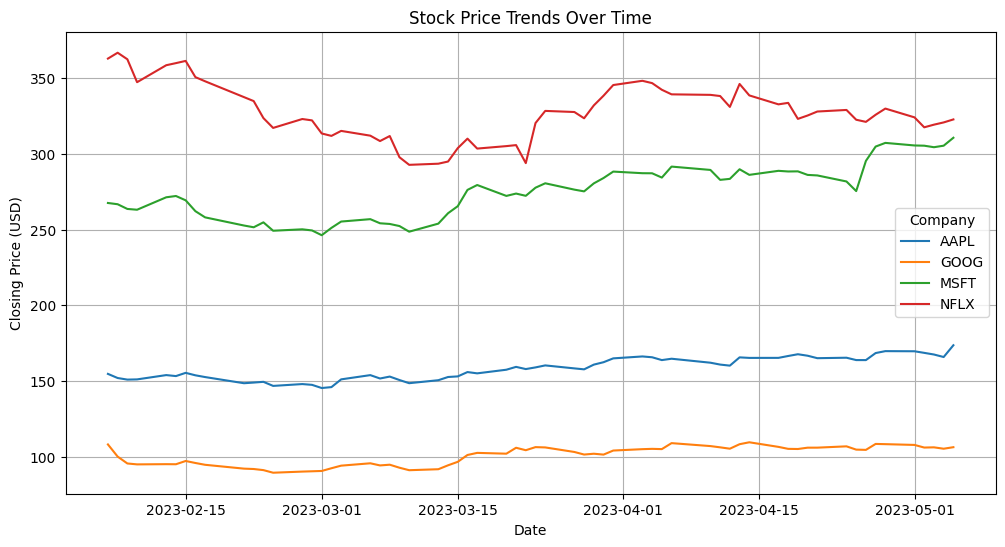

In [8]:
# Plot stock price trends
plt.figure(figsize=(12, 6))
for ticker in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[ticker], label=ticker)

plt.title("Stock Price Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend(title="Company")
plt.grid(True)
plt.show()

In [11]:
# Compute moving averages
df_ma_7 = df_pivot.rolling(window=7).mean()
df_ma_30 = df_pivot.rolling(window=30).mean()

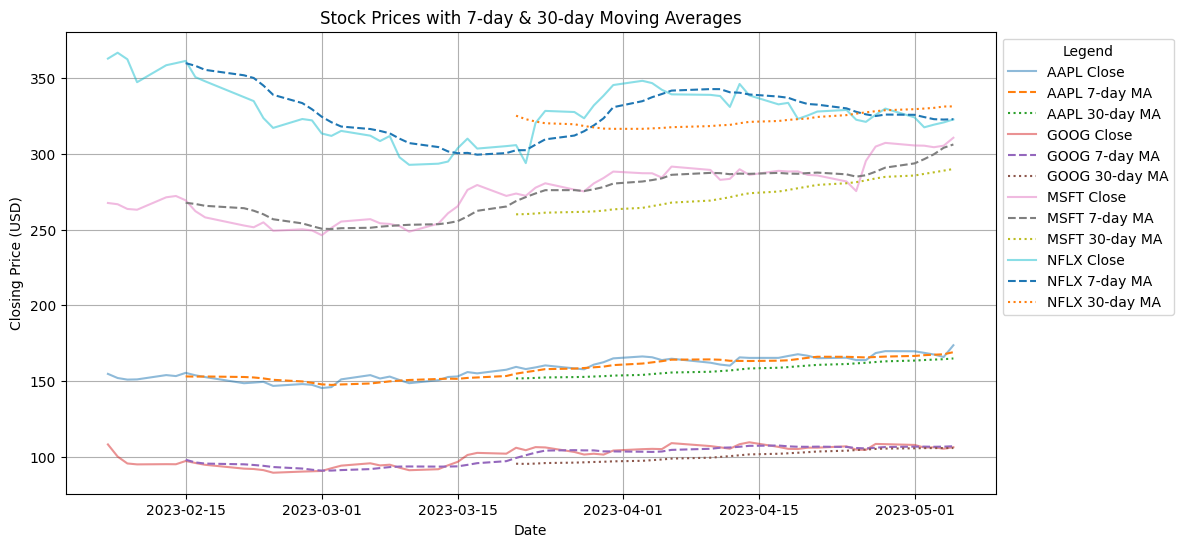

In [12]:
# Plot moving averages
plt.figure(figsize=(12, 6))
for ticker in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[ticker], label=f"{ticker} Close", alpha=0.5)
    plt.plot(df_ma_7.index, df_ma_7[ticker], linestyle='dashed', label=f"{ticker} 7-day MA")
    plt.plot(df_ma_30.index, df_ma_30[ticker], linestyle='dotted', label=f"{ticker} 30-day MA")

plt.title("Stock Prices with 7-day & 30-day Moving Averages")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend(title="Legend", loc="upper left", bbox_to_anchor=(1,1))
plt.grid(True)
plt.show()

In [13]:
# Compute daily percentage returns
df_returns = df_pivot.pct_change().dropna()

In [14]:
# Compute and display volatility (standard deviation of returns)
volatility = df_returns.std()
print("Stock Volatility:")
print(volatility)

Stock Volatility:
Ticker
AAPL    0.014152
GOOG    0.020710
MSFT    0.017881
NFLX    0.022481
dtype: float64


In [15]:
# Compute correlation matrix for stock returns
correlation_matrix = df_returns.corr()

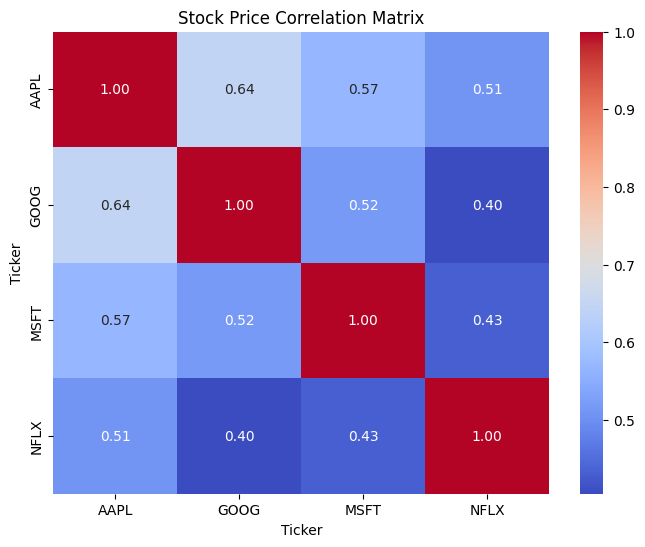

In [16]:
# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Stock Price Correlation Matrix")
plt.show()